# Introduction
In this <strong>PROJECT</strong>, I will be touching on a few statistical and exploratory data analysis of the <code>FIFA 19 dataset</code> covering over <code>18k+ players</code>, each with <code>85+ attributes</code> extracted from the <code>EA Sports FIFA 19</code> database

On this journey, we will be getting some insights from the dataset by asking the right questions.

Hopefully, I am detailed enough and ask the right questions to get the best out of this dataset. The dataset is pretty huge and it is by far, the most challenging task I have ever dared to take-on. This is massive and I have a fine blend of angst and excitement as I dig into task.

Wish me luck as we go through it together. 

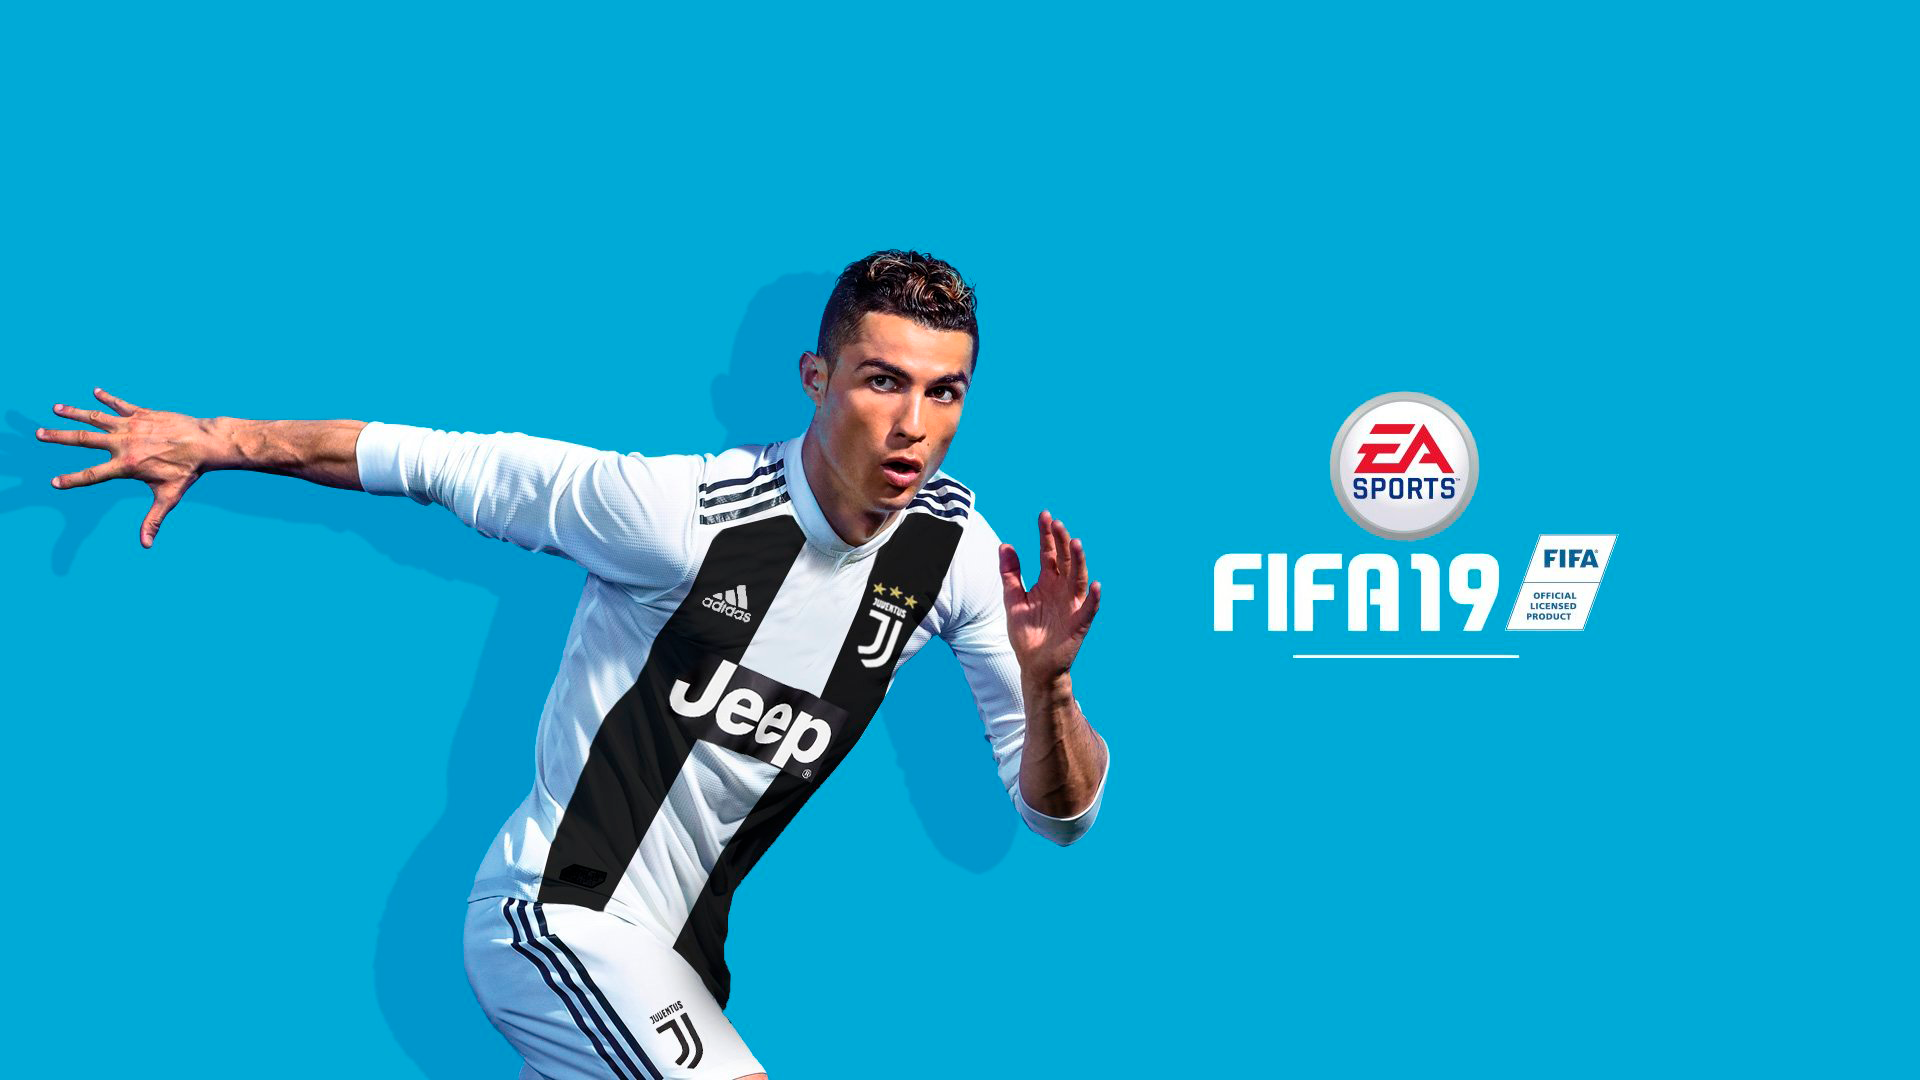

In [4]:
# Importing libraries and preparing the grounds for take off
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import pi
import seaborn as sns
import datetime
import geopandas as gpd
import pycountry
%matplotlib inline

In [5]:
#read data and inspecting head
fifa19 = pd.read_csv('fifa19.csv')
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Inspection
Great! time to do some statistical inspection and find out what is really going on in our data

In [6]:
fifa19.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


As shown are there are <strong> 44</strong> <code>numerical</code> columns out of the <strong>89</strong> columns. I will further test the veracity of this claim next by checking the data types of the columns and inspecting which ones have all entries complete and which ones have missing entries. This is a very important step in getting to understand our dataset

In [8]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

We can see that there are 89 columns, 36 of which are floats; 6 integer types and 45 strings or object types. The data is 12.4MB ... We can also see that there are a several NAN values. We can verify this by checking if the various columns have NAN or Null values

In [9]:
fifa19.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

Very well! our suspicions have been confirmed. There are several columns with a lot of missing data. I will now check out what the columns really are; prune out the redundant ones and work with what will really help the course of our analysis.

In [10]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
new_cols=['Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation','Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage','Weak Foot','Work Rate']

In [12]:
#create a new dataframe with only these new columns
df=pd.DataFrame(fifa19,columns=new_cols)
df.sample(5)

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
6417,T. Serbest,24,Turkey,69,74,1775,62.0,65.0,64.0,67.0,...,66.0,73.0,68.0,72.0,€1.2M,65.0,36.0,€7K,3.0,Medium/ Medium
6760,Gerard Badía,28,Spain,68,68,1762,73.0,42.0,80.0,69.0,...,77.0,67.0,23.0,70.0,€900K,66.0,64.0,€4K,3.0,High/ Medium
14110,A. Zendejas,22,United States,61,71,1019,35.0,18.0,37.0,37.0,...,39.0,24.0,16.0,57.0,€300K,56.0,12.0,€1K,3.0,Medium/ Medium
15331,A. de Jong,21,New Zealand,59,67,1443,61.0,30.0,61.0,65.0,...,68.0,62.0,20.0,66.0,€0,54.0,43.0,€0,2.0,High/ Medium
15656,M. López,27,Colombia,59,60,1579,63.0,45.0,58.0,55.0,...,66.0,58.0,58.0,64.0,€140K,59.0,39.0,€1K,3.0,Medium/ Medium


# Initial Analysis

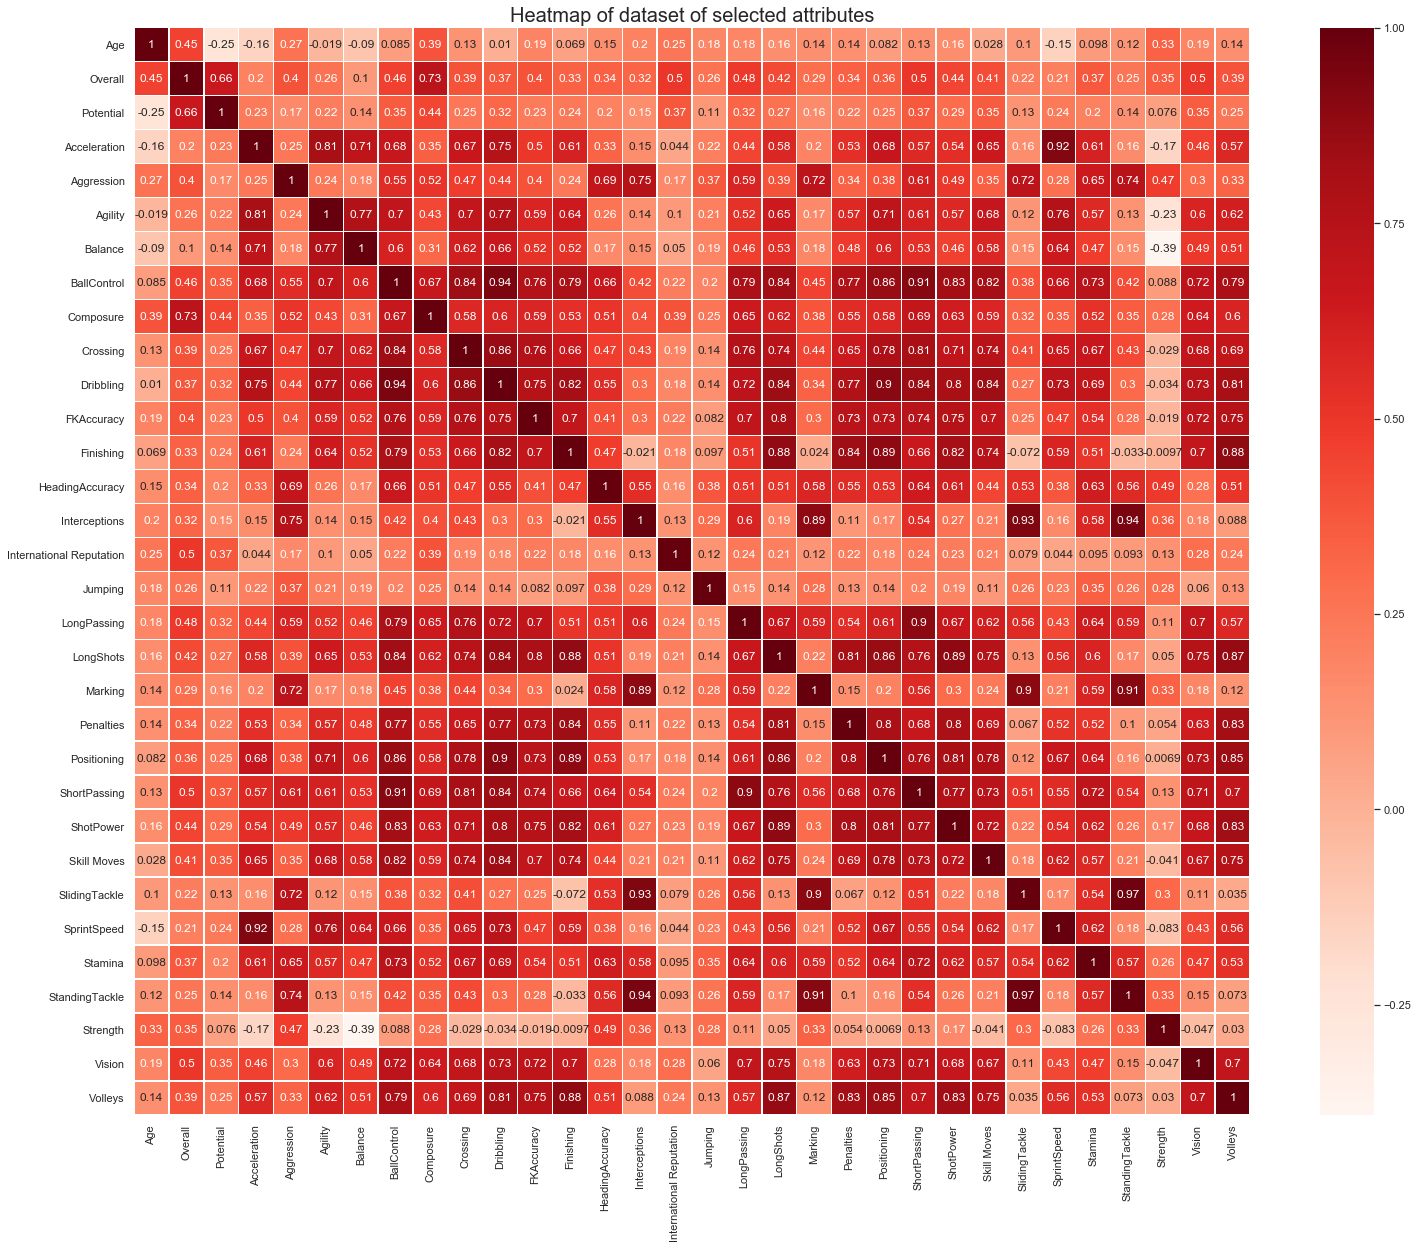

In [27]:
plt.rcParams['figure.figsize']=(25,20)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset of selected attributes', fontsize=20)
hm

The heatmap shows us some obvious correlations between attributes and other not soo obvious correlations. For instance, <code>age</code> is negatively correlated to <code>Potential</code>; It is fairly correlated with <code>Overall</code>. There are several other examples throughout the heatmap. Further analysis will draw out a lot more insightful conclusions from the data. For now I will proceed with checking how related some specific attributes are with each other.

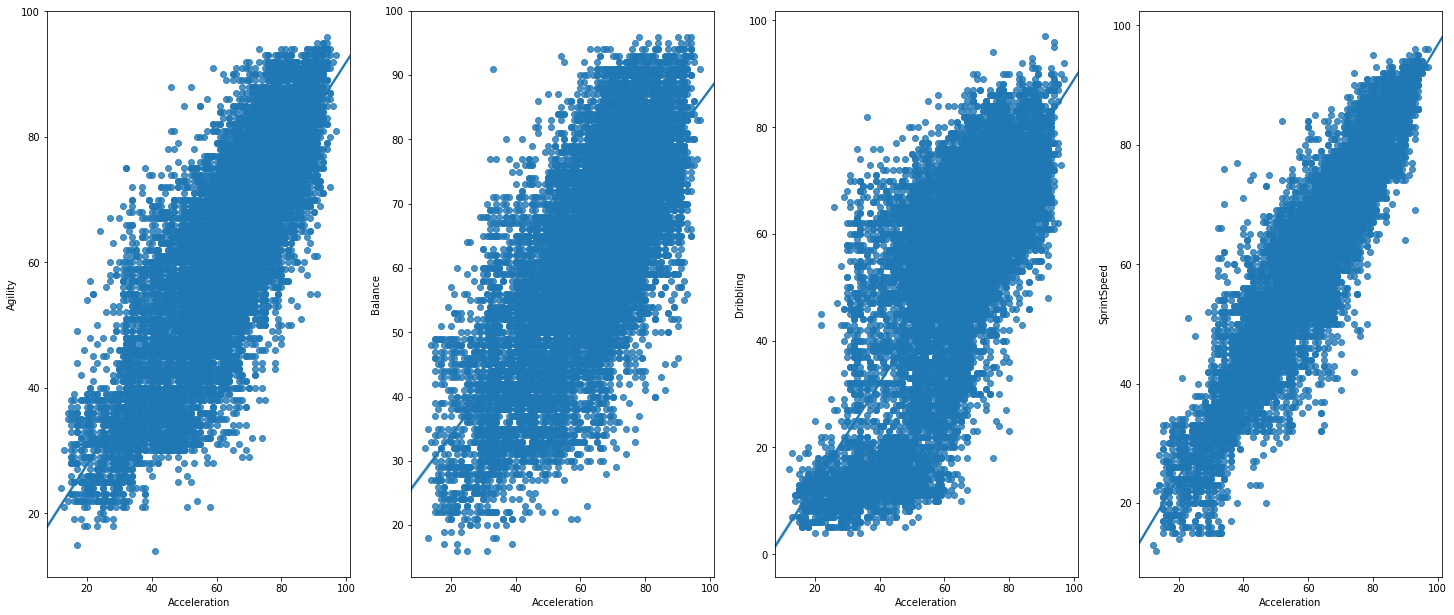

In [23]:
# Scater plot shows correlation between Acceleration and some often associated attributes
def spec_scatter(df):
    attributes = ('Agility', 'Balance', 'Dribbling', 'SprintSpeed')
    
    for index, attributes in enumerate(attributes):
        plt.subplot(4/4+1, 4, index+1)
        ax = sns.regplot(x = 'Acceleration', y = attributes, data = df)

plt.figure(figsize = (25, 25))
plt.subplots_adjust(hspace = 0.4)

spec_scatter(df)

# Let's get down to the Individual players
We are gradually inching closer to getting the insights we're hoping to get from the data. The players are at the centre of the analysis here so it is only fair we dig into their <code>*private lives*</code> 

I will now find out how the ages of the over 18,000 players distributed. Let's go!

Text(0.5, 1.0, 'Histogram of players age')

<Figure size 1800x1440 with 0 Axes>

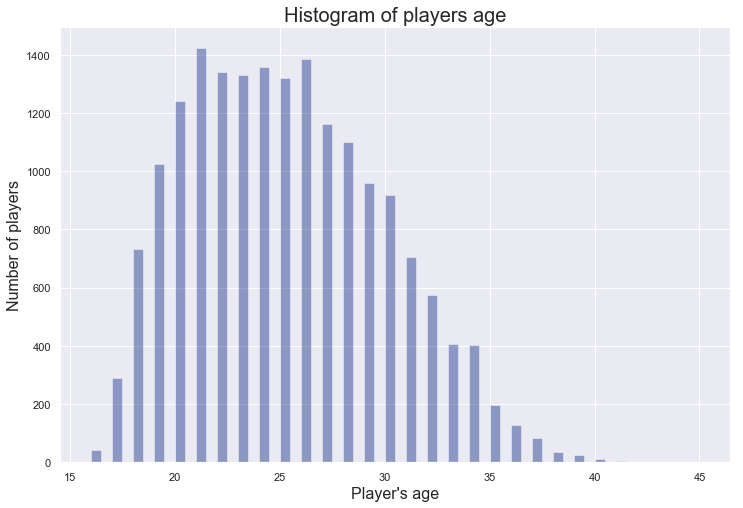

In [49]:
# Histogram: number of players's age
sns.set(style ="darkgrid", palette='dark', color_codes=True)
sns.despine(left=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='b')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)

It almost go without showing that the majority of the players will be between the ages of <code>17</code> and <code>34</code> years with the peak ages being around <code>27</code> years. Being <code>27 years</code> in football-speak is a pretty advanced age so we expect our players to start peaking around that time. So much to do in a relatively short career.

## Who are the Oldest and the youngest in the world
I will be finding out who the players at the extreme end of the histogram are. <strong>Who are the Oldest players?</strong> and <strong>Who are the youngest?</strong>

In [52]:
# the 10 oldest players 
oldest_players = df.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age','Overall']].head(10)
oldest_players.set_index('Name', inplace=True)
oldest_players

,Nationality,Age,Overall
Name,,,
O. Pérez,Mexico,45,71
K. Pilkington,England,44,48
T. Warner,Trinidad & Tobago,44,53
S. Narazaki,Japan,42,65
C. Muñoz,Argentina,41,68
J. Villar,Paraguay,41,77
H. Sulaimani,Saudi Arabia,41,63
M. Tyler,England,41,59
B. Nivet,France,41,71


In [53]:
# 10 youngest players
youngest = df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age','Overall','Potential']].head(10)
youngest.set_index('Name', inplace=True)
youngest

,Nationality,Age,Overall,Potential
Name,,,,
G. Nugent,England,16,46,66
J. Olstad,Norway,16,52,69
H. Massengo,France,16,62,75
J. Italiano,Australia,16,58,79
N. Ayéva,Sweden,16,48,72
K. Broda,Poland,16,53,74
L. D'Arrigo,Australia,16,54,71
Y. Verschaeren,Belgium,16,62,83
B. Nygren,Sweden,16,56,73


## Could We compare some clubs in terms of player's ages?
Let's go ahead and see how some teams compare in terms of the ages of the players on their books. The choice of the teams to compare are arbitrary. I will go for some of the top clubs in Europe and my <code>Manchester United</code> bias will evidently show here. Not that we aren't a top club anywhere. Remember form is only temporal

Text(0.5, 1.0, 'Distribution of age in some elite clubs')

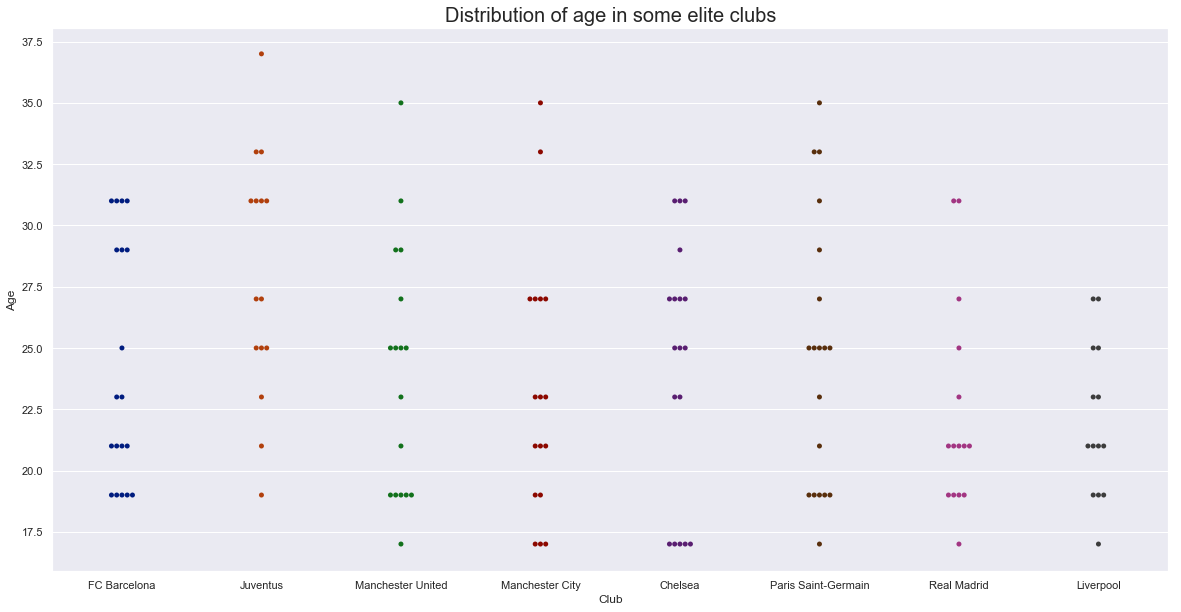

In [59]:
elite_clubs = ('Juventus', 'Paris Saint-Germain', 'FC Barcelona','Real Madrid', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool')
df_club = df.loc[df['Club'].isin(elite_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.swarmplot(x="Club", y="Age", data=df_club, orient='v');
ax.set_title(label='Distribution of age in some elite clubs', fontsize=20)

## How about testing player's loyalty?
Let's see the players who have remained so loyal to their clubs. I will be filtering out the players who have been one-club guys or have stayed at one club for a protracted period of time

In [94]:
# The longest membership in the club
now = datetime.datetime.now()
df['Join year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_memberhip'] = (df.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int').dropna()
membership = df[['Name', 'Club', 'Years_of_member','Join year']].sort_values(by = 'Years_of_member', ascending = False).dropna().head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member,Join year
Name,,,
O. Pérez,Pachuca,28.0,1991
M. Ogasawara,Kashima Antlers,21.0,1998
H. Sogahata,Kashima Antlers,21.0,1998
M. Al Shalhoub,Al Hilal,21.0,1998
S. Narazaki,Nagoya Grampus,20.0,1999
M. Wölfli,BSC Young Boys,19.0,2000
K. Kitamoto,Vissel Kobe,19.0,2000
C. Källqvist,BK Häcken,18.0,2001
Y. Endo,Gamba Osaka,18.0,2001


# The most popular positions
Now that we have an idea how the ages are distributed and the most loyal and least loyal players are, we could find out the most popular positions. 

Text(0.5, 1.0, 'Count of players in a particluar position')

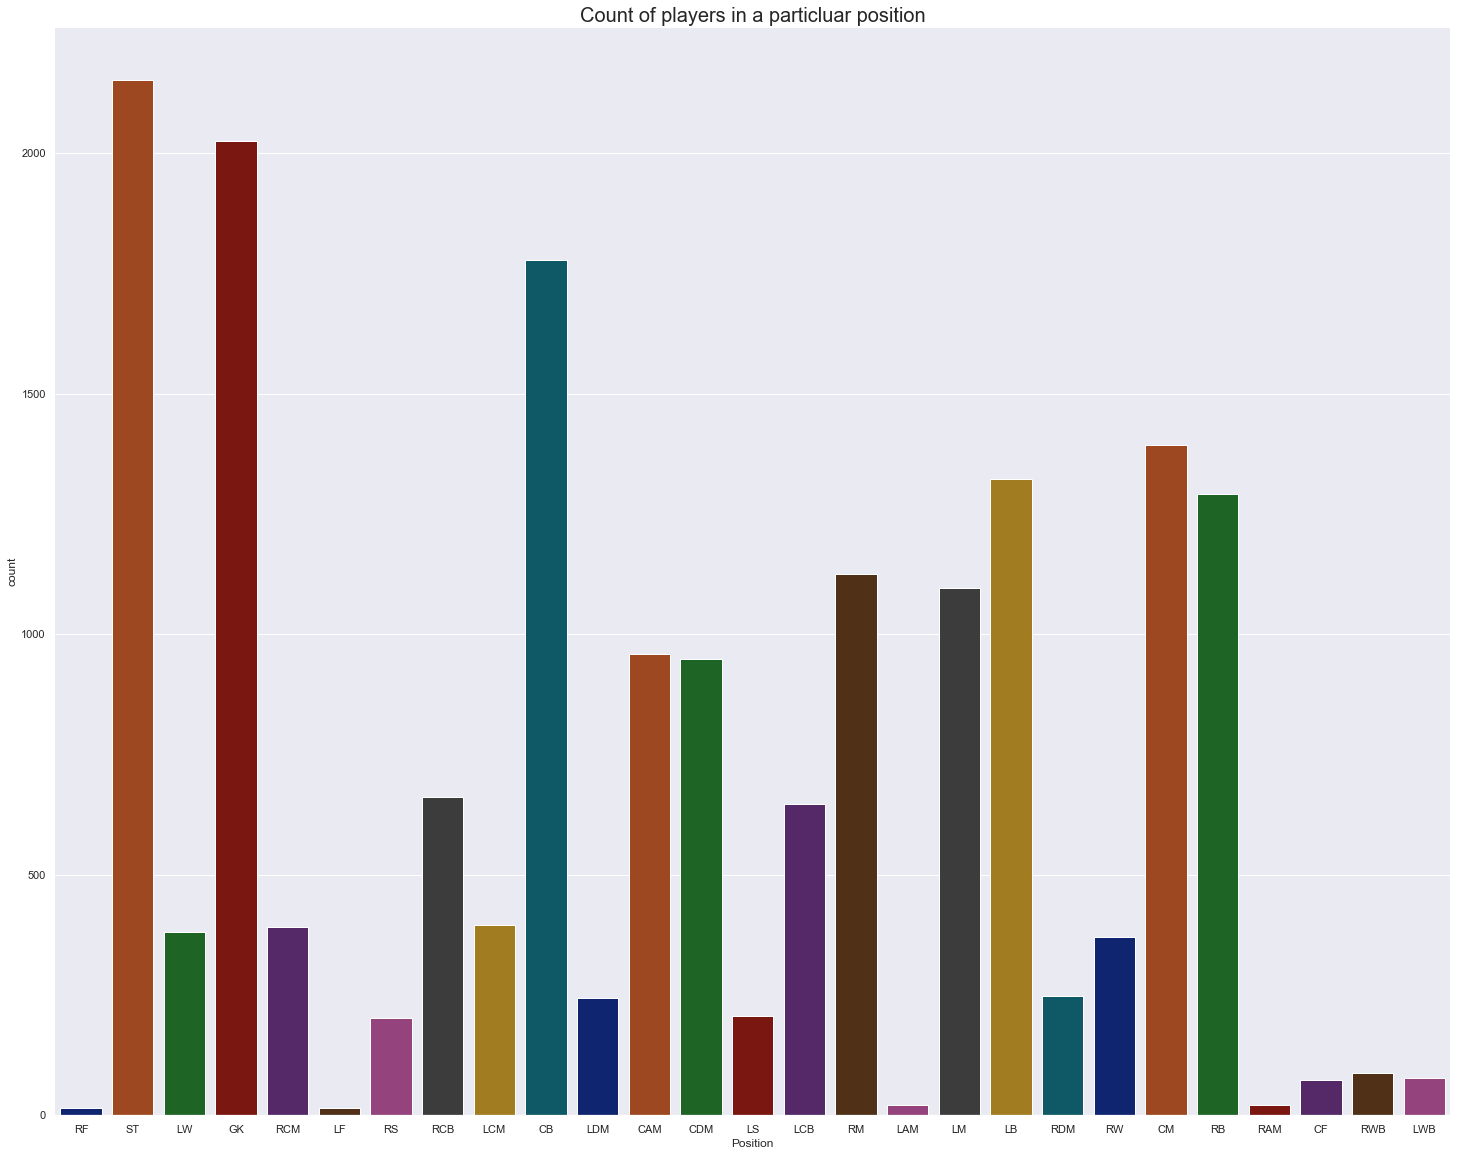

In [89]:
ax = sns.countplot(x = 'Position', data = df, palette = 'dark')
sns.despine(left=True)
ax.set_title(label='Count of players in a particluar position', fontsize=20)

It is often the case that <code>Strikers</code>, <code>Centre-Banks</code> and <code>midfielders</code> are the most popular positions on a football field but for <code>Goalkeepers</code>? that looks a bit strange. Maybe we will find out a bit later why it is that GK is the 2nd most popular position according this FIFA 19 dataset 

# Time now to move on to the Clubs Teams

## Could we also find out the aggregate ages of the oldest and youngest Club teams?
I have a feeling we can. Let's get into it.

In [81]:
# Top 10 Oldest team by the total of their ages
df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(10)


Club
Cardiff City           863
Villarreal CF          851
Burnley                850
Frosinone              843
Chelsea                832
CD Leganés             832
MKE Ankaragücü         829
Júbilo Iwata           827
Empoli                 827
Eintracht Frankfurt    825
Name: Age, dtype: int64

In [82]:
#Top 10 youngest teams by the total of their ages
df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).head(10)

Club
Derry City            398
Sligo Rovers          421
Limerick FC           436
Tromsø IL             476
FK Haugesund          508
Bray Wanderers        511
Shamrock Rovers       519
Östersunds FK         525
Wellington Phoenix    533
Melbourne Victory     537
Name: Age, dtype: int64

## How about finding the oldest and youngest Club teams in terms of average ages?


In [83]:
#the oldest team
df.groupby(['Club'])['Age'].mean().sort_values(ascending = False).head(5)

Club
Paraná                 31.6
Cruzeiro               30.6
Atlético Paranaense    30.4
Chapecoense            30.4
Botafogo               30.4
Name: Age, dtype: float64

In [84]:
#the youngest team
df.groupby(['Club'])['Age'].mean().sort_values(ascending = True).head(5)

Club
FC Nordsjælland             20.259259
FC Groningen                21.423077
Bohemian FC                 21.480000
FC Sochaux-Montbéliard      21.678571
FC Admira Wacker Mödling    21.925926
Name: Age, dtype: float64

We've seen that <code>Parana</code>,<code>Cruzeiro</code>, <code>Atlelico Paranaense</code> are top 3 teams with the highest average age while <code>FC Nordsjaelland</code>, <code>FC Groningen</code>,<code>Bohemian FC</code> are the top 3 youngest teams in the world.

## How about the National teams

In [85]:
df.groupby(['Nationality'])['Age'].mean().sort_values(ascending = False).head(5)

Nationality
Oman                 36.00
Puerto Rico          34.00
Ethiopia             32.00
Trinidad & Tobago    31.75
Palestine            31.00
Name: Age, dtype: float64

# Check the Overall ratings of a few selected clubs

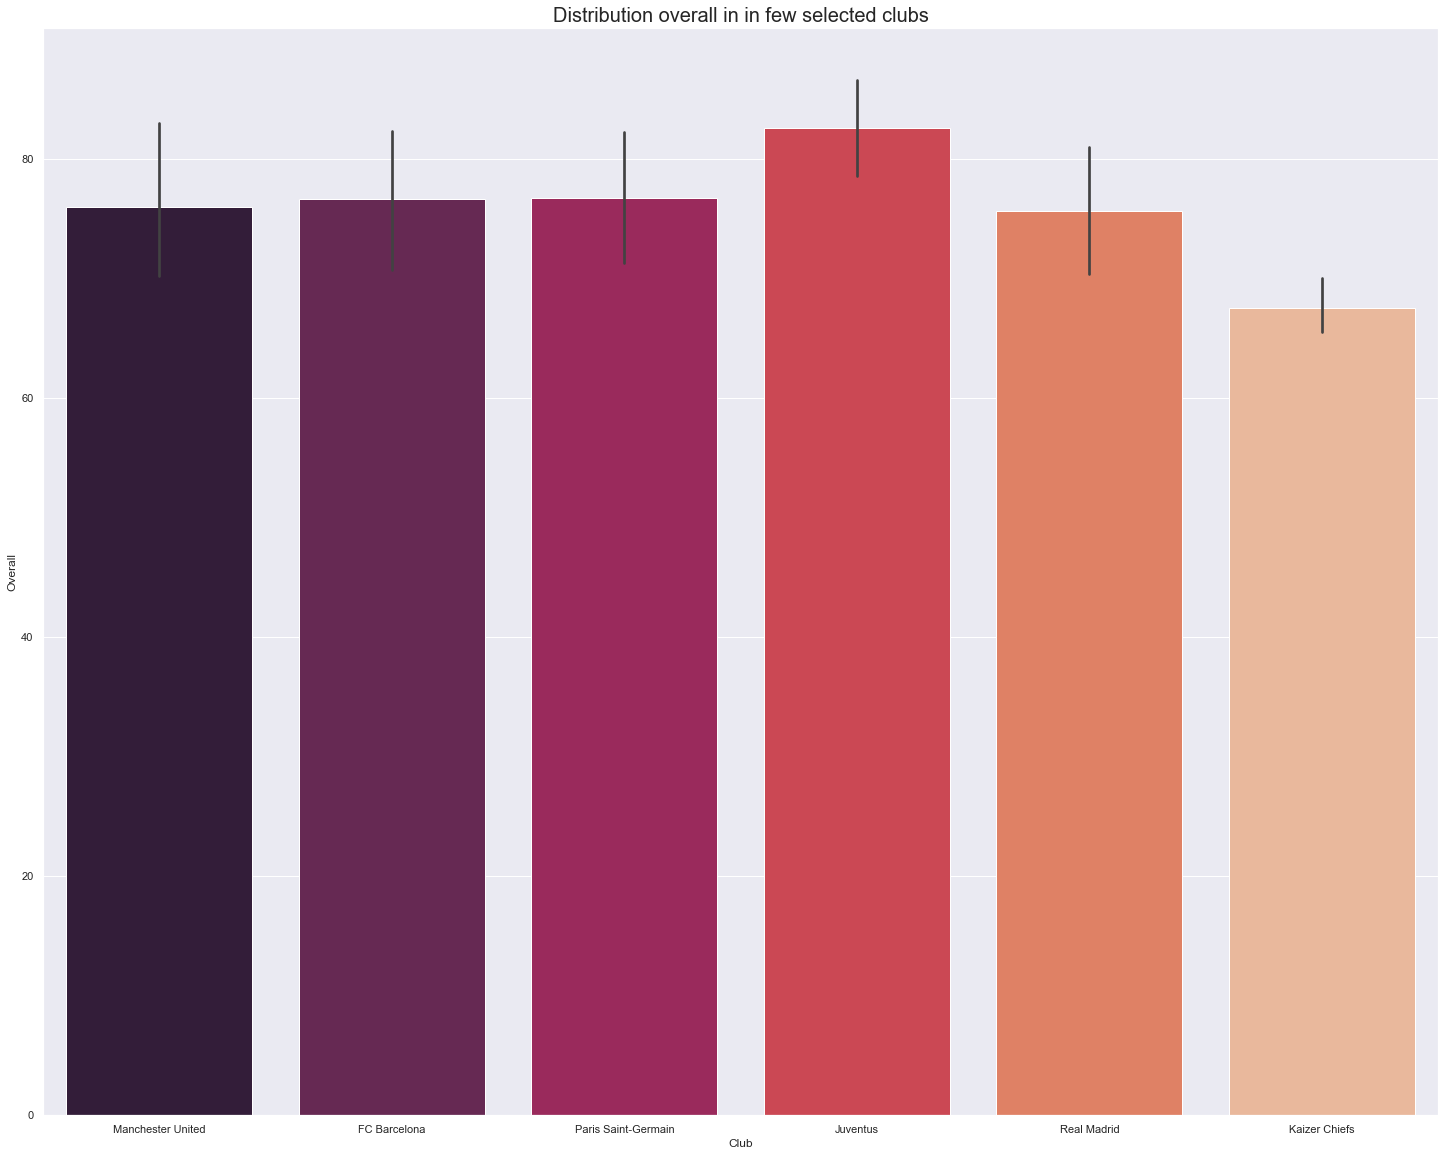

In [80]:
#Overall player ratings of a few selected clubs
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Kaizer Chiefs', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age'] & df['Overall'] ]

ax = sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="rocket");
ax.set_title(label='Distribution overall in in few selected clubs', fontsize=20);

# Now Back to the Players

## the best players in the respective positions 

In [92]:
#Best players per position
best=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position','Overall']]
best

,Name,Position,Overall
17,A. Griezmann,CAM,89
12,D. Godín,CB,90
20,Sergio Busquets,CDM,89
271,Luis Alberto,CF,82
67,Thiago,CM,86
3,De Gea,GK,91
28,J. Rodríguez,LAM,88
35,Marcelo,LB,88
24,G. Chiellini,LCB,89
11,T. Kroos,LCM,90


Good! We have seen the best players in the respective positions. What about getting to know the qualities that make any player good in a particular position? 

Looks like a good idea. Finding out the topmost qualities that make a player great in a specific position will put things in proper perspective. Let's get into it.

In [98]:
features = ('Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 'Stamina',
    'Crossing', 'Dribbling', 'FKAccuracy', 'Strength',
    'Finishing', 'GKDiving', 'GKHandling', 'ShotPower',
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features per position
for i, val in df.groupby(df['Position'])[features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration, BallControl
Position CB: Strength, Jumping, Aggression, HeadingAccuracy
Position CDM: Stamina, Aggression, Strength, Jumping
Position CF: Agility, Balance, Acceleration, Dribbling
Position CM: Balance, Agility, Stamina, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling
Position LAM: Agility, Balance, Acceleration, Dribbling
Position LB: Acceleration, Stamina, Balance, Agility
Position LCB: Strength, Jumping, Aggression, HeadingAccuracy
Position LCM: Stamina, Balance, Agility, BallControl
Position LDM: Stamina, Strength, Aggression, BallControl
Position LF: Balance, Agility, Acceleration, Dribbling
Position LM: Acceleration, Agility, Balance, Dribbling
Position LS: Strength, Acceleration, ShotPower, Agility
Position LW: Acceleration, Agility, Balance, Dribbling
Position LWB: Acceleration, Stamina, Agility, Balance
Position RAM: Agility, Balance, Acceleration, Dribbling
Position RB: Stamina, Acceleration, Balance, Jump

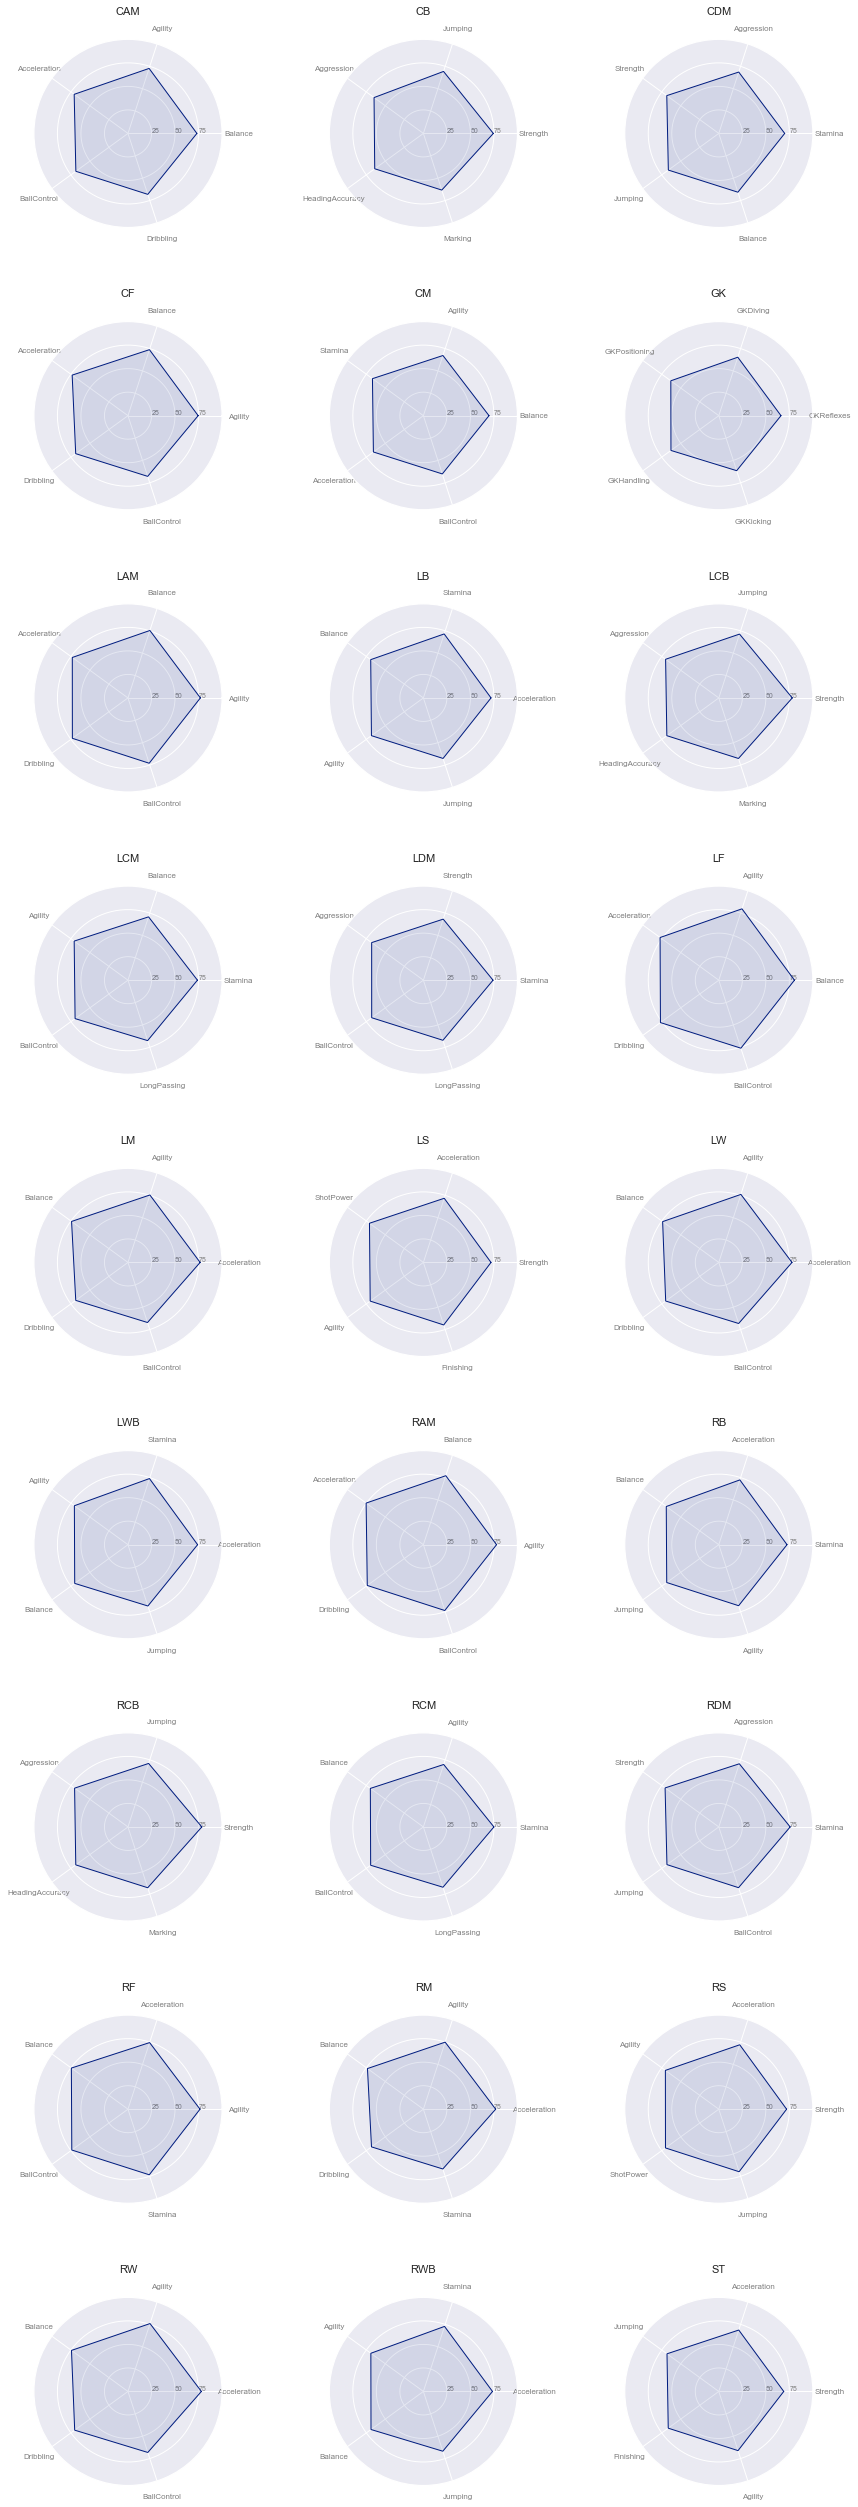

In [100]:
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

# Players with special abilities

## Top left-footed players

In [122]:
#Top 6 left-footed players
df[df['Preferred Foot']=='Left'][['Name','Overall','BallControl','Dribbling','Finishing','ShotPower']].head(6)

,Name,Overall,BallControl,Dribbling,Finishing,ShotPower
0,L. Messi,94,96.0,97.0,95.0,85.0
13,David Silva,90,94.0,89.0,76.0,72.0
15,P. Dybala,89,92.0,92.0,84.0,82.0
17,A. Griezmann,89,90.0,88.0,90.0,80.0
19,T. Courtois,89,23.0,13.0,14.0,36.0
24,G. Chiellini,89,57.0,58.0,33.0,78.0


## Top Right-footed players

In [108]:
#Top 6 right-footed players
df[df['Preferred Foot']=='Right'][['Name','Overall','BallControl','Dribbling','Finishing']].head()

,Name,Overall,BallControl,Dribbling,Finishing
1,Cristiano Ronaldo,94,94.0,88.0,94.0
2,Neymar Jr,92,95.0,96.0,87.0
3,De Gea,91,42.0,18.0,13.0
4,K. De Bruyne,91,91.0,86.0,82.0
5,E. Hazard,91,94.0,95.0,84.0


In [120]:
rank=df.groupby(df['Preferred Foot'])[['Name','Overall','Finishing']].max()
rank

,Name,Overall,Finishing
Preferred Foot,,,
Left,Óscar Whalley,94,95.0
Right,Óscar Valentín,94,94.0


# Which of these two sets of players are more elegant on the ball?

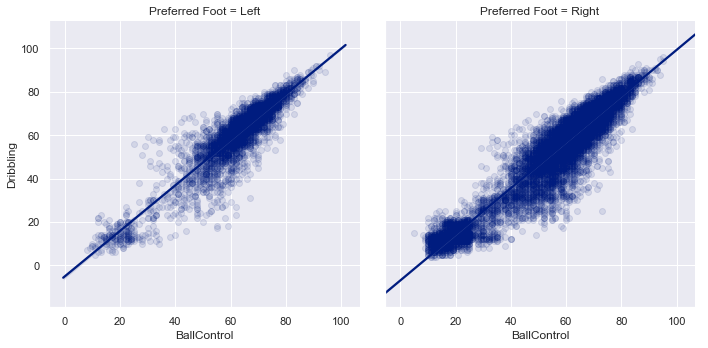

In [121]:
# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,
          scatter_kws = {'alpha':0.1},
          col = 'Preferred Foot');

## Best Players in age groups

In [163]:
#The best players in every age group
df['quality'] = (df.Overall/20 + df.Potential/20 + df['BallControl'] + df['Skill Moves'] + df['Finishing'] + df['International Reputation'])*5
new = df.groupby('Age')['quality'].max().reset_index()
age_scores = list(zip(new.Age,new.quality))
top_players=pd.DataFrame()
for index,i in enumerate(age_scores):
    top_players = top_players.append(df[(df.Age == i[0] ) & (df.quality == i[1])],ignore_index=True )

top_players[['Name','Age','Overall','Nationality']]   

,Name,Age,Overall,Nationality
0,A. Taoui,16,64,France
1,Vinícius Júnior,17,77,Brazil
2,J. Sancho,18,77,England
3,K. Mbappé,19,88,France
4,L. Martínez,20,79,Argentina
5,Gabriel Jesus,21,83,Brazil
6,A. Martial,22,84,France
7,A. Correa,23,81,Argentina
8,H. Kane,24,89,England
9,M. Icardi,25,87,Argentina


## Best players in Age group solely on Overall Abilities

In [179]:
# Best in age group purely based on Overall abilities
Overall_based=df.groupby('Age')['Overall'].max().reset_index()
abs_best=pd.DataFrame()
for index, i in enumerate(age_ability_list):
    abs_best = abs_best.append(df[(df.Age==i[0]) & (df.Overall==i[1])],ignore_index=True)
abs_best[['Name','Age','Overall','Nationality']]

,Name,Age,Overall,Nationality
0,W. Geubbels,16,64,France
1,A. Taoui,16,64,France
2,Vinícius Júnior,17,77,Brazil
3,M. de Ligt,18,82,Netherlands
4,K. Mbappé,19,88,France
5,M. Rashford,20,81,England
6,L. Bailey,20,81,Jamaica
7,O. Dembélé,21,83,France
8,Gabriel Jesus,21,83,Brazil
9,L. Sané,22,86,Germany


## How are these talents distributed in terms of Countries?

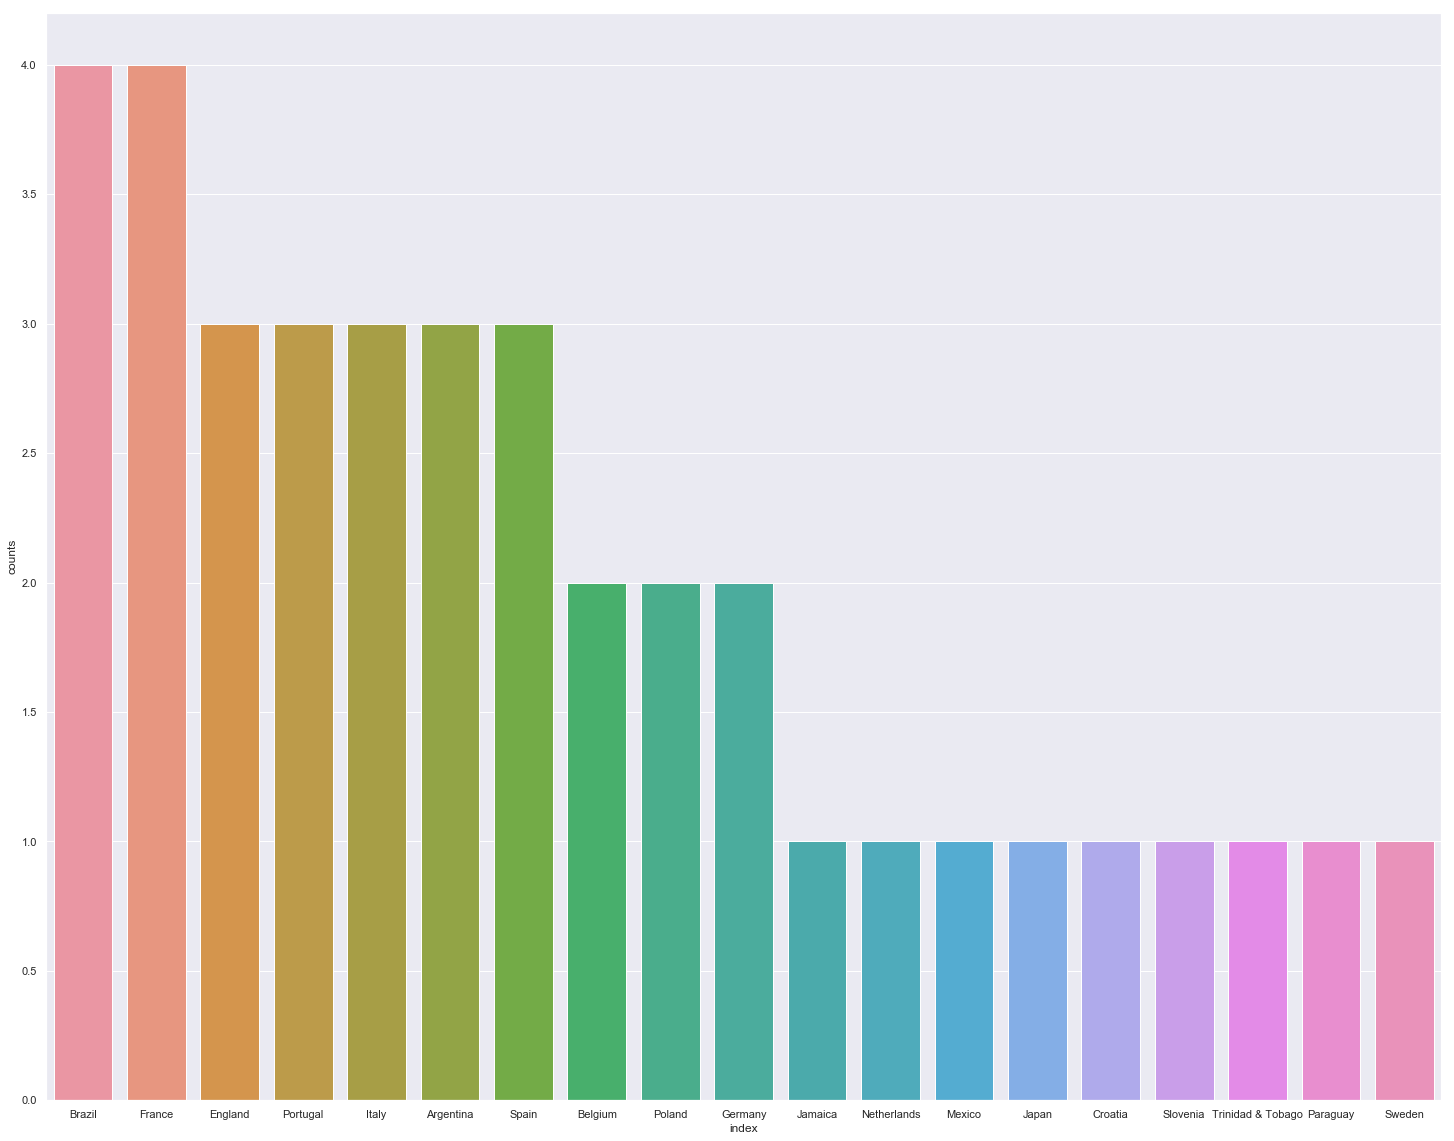

In [190]:
BPP=abs_best.Nationality.value_counts().reset_index(name='counts')
sns.barplot(x='index',y='counts',data=BPP)

In [193]:
BPPs=BPP=abs_best.Nationality.value_counts().reset_index()
BPPs

,index,Nationality
0,Brazil,4
1,France,4
2,England,3
3,Portugal,3
4,Italy,3
5,Argentina,3
6,Spain,3
7,Belgium,2
8,Poland,2
9,Germany,2
